### Predict the percentage of marks of an student based on the number of study hours.

Done by divya maniya.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

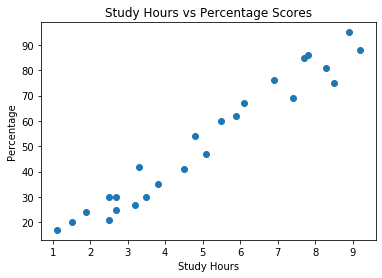

In [5]:
x = df[['Hours']]
y = df['Scores']

plt.scatter(x,y)
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.title('Study Hours vs Percentage Scores')
plt.show()

In [6]:
df.corr()           # As we can see that the Hours of study strongly positively correlated to scores.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
# Model Development
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)        # percentage = 2.0181600414346974 + 9.91065648 * hours

2.0181600414346974
[9.91065648]


(0, 101.73095615126216)

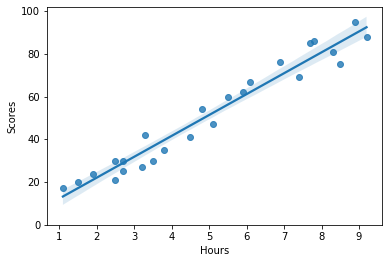

In [16]:
# Model Evaluation using visualization :
sns.regplot(x,y,data=df)
plt.ylim(0,)

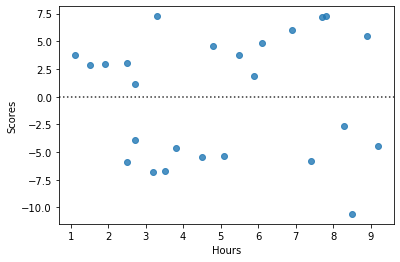

In [15]:
sns.residplot(x,y,data=df)

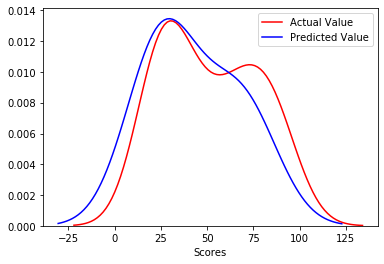

In [14]:
ax1 = sns.distplot(y,hist=False,color='r',label='Actual Value')
sns.distplot(yhat,hist=False,color='b',label='Predicted Value',ax=ax1)

In [12]:
yhat = reg.predict(x_test)

# Model Evaluation:
from sklearn.metrics import r2_score
print('Mean Absolute Error: %.2f'% np.mean(np.absolute(yhat - y_test)))
print('Residual Sum Of Squares (MSE): %.2f'% np.mean((yhat - y_test)**2))
print('R2-Score: %.2f'% r2_score(yhat , y_test))
print('Variance Score: %.2f'% reg.score(x_test , y_test))

Mean Absolute Error: 4.18
Residual Sum Of Squares (MSE): 21.60
R2-Score: 0.95
Variance Score: 0.95


What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
hours = 9.25
t = np.array([hours])
t = t.reshape(-1,1)

predictedScore = reg.predict(t)
print('Number of Study Hours {0} , PredictedScore {1}.'.format(hours,predictedScore[0]))

Number of Study Hours 9.25 , PredictedScore 93.69173248737535.
